In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [2]:
train= ImageDataGenerator(rescale=1/255)
validation= ImageDataGenerator(rescale=1/255)

In [3]:
img=image.load_img("C:/Users/91914/OneDrive/Desktop/experiment/testing/negative/IM-0003-0001.jpeg")

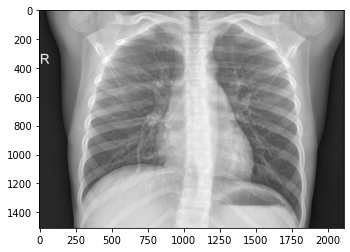

In [4]:
plt.imshow(img)

In [5]:
train_dataset=train.flow_from_directory('C:/Users/91914/Downloads/archive (2)/chest_xray/train',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')

validation_dataset=validation.flow_from_directory('C:/Users/91914/Downloads/archive (2)/chest_xray/val',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [6]:
test_dataset=validation.flow_from_directory('C:/Users/91914/Downloads/archive (2)/chest_xray/test',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')

Found 624 images belonging to 2 classes.


In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation ='relu', input_shape=(200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                   
                                   
                                   
                                   
                                   ])

In [8]:
model.compile(loss= 'binary_crossentropy',
             optimizer= RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

In [9]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs = 10,
                      validation_data=validation_dataset)

Epoch 1/10
5/5 [==============================] - 2s 316ms/step - loss: 3.6948 - accuracy: 0.6667 - val_loss: 1.4779 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 1s 248ms/step - loss: 1.0971 - accuracy: 0.5333 - val_loss: 0.9004 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 1s 240ms/step - loss: 0.7158 - accuracy: 0.6000 - val_loss: 0.6691 - val_accuracy: 0.7500
Epoch 4/10
5/5 [==============================] - 1s 239ms/step - loss: 0.7090 - accuracy: 0.6000 - val_loss: 0.6536 - val_accuracy: 0.6250
Epoch 5/10
5/5 [==============================] - 1s 237ms/step - loss: 0.6510 - accuracy: 0.7333 - val_loss: 0.6723 - val_accuracy: 0.5625
Epoch 6/10
5/5 [==============================] - 1s 237ms/step - loss: 0.5584 - accuracy: 0.6667 - val_loss: 3.0413 - val_accuracy: 0.5000
Epoch 7/10
5/5 [==============================] - 1s 244ms/step - loss: 0.8924 - accuracy: 0.7333 - val_loss: 0.7176 - val_accuracy: 0.5000
Epoch 8/10
5/5 [====

In [10]:
predictions = model.predict(train_dataset)
predictions

1739/1739 [==============================] - 68s 39ms/step


array([[0.9928023 ],
       [0.99651796],
       [0.99412185],
       ...,
       [0.99579287],
       [0.9940177 ],
       [0.9974408 ]], dtype=float32)

In [11]:
predictions.shape

(5216, 1)

In [12]:
score = tf.nn.softmax(predictions[0])

In [13]:
np.argmax(score)

0

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

In [15]:
cnn_model = model.fit(train_dataset,
                         steps_per_epoch = 163,
                         epochs = 1,
                         validation_data = validation_dataset,
                         validation_steps = 624)

163/163 [==============================] - 32s 193ms/step - loss: 0.4811 - accuracy: 0.8405 - val_loss: 0.7945 - val_accuracy: 0.6250


In [16]:
test_accu = model.evaluate(test_dataset,steps=624)

624/624 [==============================] - 8s 13ms/step - loss: 0.8046 - accuracy: 0.7420


In [17]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 74.19871687889099 %
